In [1]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "data/highAHI/OSAA10002_New.edf"
signals, signal_headers, header = highlevel.read_edf(path)

In [3]:
print(signals[0].shape)
print(signals[0])
print(header)

(868992,)
[-462.5        -447.91666667 -431.25       ... -135.41666667  -97.91666667
  -60.41666667]
{'technician': '', 'recording_additional': '', 'patientname': '', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'sex': '', 'startdate': datetime.datetime(2016, 8, 15, 22, 14, 53), 'birthdate': '', 'gender': '', 'annotations': []}


In [4]:
signal_headers

[{'label': 'Airflow',
  'dimension': 'uV',
  'sample_frequency': 32.0,
  'physical_max': -50.0,
  'physical_min': 50.0,
  'digital_max': 24,
  'digital_min': -24,
  'prefilter': '',
  'transducer': ''},
 {'label': 'RIBCAGE',
  'dimension': 'uV',
  'sample_frequency': 32.0,
  'physical_max': -50.0,
  'physical_min': 50.0,
  'digital_max': 24,
  'digital_min': -24,
  'prefilter': '',
  'transducer': ''},
 {'label': 'ABDOMEN',
  'dimension': 'uV',
  'sample_frequency': 32.0,
  'physical_max': -50.0,
  'physical_min': 50.0,
  'digital_max': 24,
  'digital_min': -24,
  'prefilter': '',
  'transducer': ''},
 {'label': 'Snore#1',
  'dimension': 'uV',
  'sample_frequency': 256.0,
  'physical_max': -50.0,
  'physical_min': 50.0,
  'digital_max': 11,
  'digital_min': -12,
  'prefilter': '',
  'transducer': ''},
 {'label': 'Nasal Pressure /',
  'dimension': 'uV',
  'sample_frequency': 256.0,
  'physical_max': -50.0,
  'physical_min': 50.0,
  'digital_max': 11,
  'digital_min': -12,
  'prefilter':

In [ ]:
import mne
from mne.io import read_raw_edf
raw = read_raw_edf("data/highAHI/OSAA10002_New.edf", preload=True, verbose=False)

In [6]:
print(raw)

<RawEDF | OSAA10002_New.edf, 35 x 6951936 (27156.0 s), ~1.81 GiB, data loaded>


| **Component**     | **Meaning**                                                                 |
|-------------------|------------------------------------------------------------------------------|
| `RawEDF`          | It's an EDF-format file loaded with `mne.io.read_raw_edf()`                 |
| `OSAA10002_New.edf` | File name of your dataset                                                  |
| `35 x 6951936`    | 35 channels × 6,951,936 samples per channel                                  |
| `27156.0 s`       | The recording is 27,156 seconds long (~7.54 hours)                           |
| `~1.81 GiB`       | Approximate memory usage (all data loaded into RAM)                          |
| `data loaded`     | You used `preload=True`, so you can access all signal data                   |


In [7]:
print(raw.ch_names)  # Lists all available signal labels

['Airflow', 'RIBCAGE', 'ABDOMEN', 'Snore#1', 'Nasal Pressure /', 'Sum Effort', 'BiNaps Nasal Pre', 'M1', 'M2', 'C3', 'C4', 'O1', 'O2', 'LOC', 'ROC', 'F3', 'F4', 'EMG1', 'EMG2', 'EMG3', 'ECG1', 'ECG2', 'L-ARM', 'R-ARM', 'L-Leg1', 'R-Leg1', 'L-Leg2', 'R-Leg2', 'SaO2', 'Pulse', 'NASAL PRES.', 'TcpCO2', 'C-Flow', 'C-Leak', 'C-Pressure']


| **Component**                         | **Meaning**                                                                                                                                                                                                                                                                                  |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `EEG Channels`                       | `'C3'`, `'C4'`, `'O1'`, `'O2'`, `'F3'`, `'F4'` → core EEG electrodes; `'M1'`, `'M2'` → EEG references                                                                                                                                                |
| `EOG Channels (Eye Movement for REM)` | `'LOC'`, `'ROC'`                                                                                                                                                                                                                                                                             |
| `EMG Channels (Muscle Tone)`         | `'EMG1'`, `'EMG2'`, `'EMG3'`                                                                                                                                                                                                                                                                |
| `Respiratory Signals (for Apnea Detection)` | `'Airflow'`, `'Nasal Pressure /'`, `'NASAL PRES.'`, `'BiNaps Nasal Pre'` → airflow proxies; `'RIBCAGE'`, `'ABDOMEN'`, `'Sum Effort'` → thoracic/abdominal effort; `'Snore#1'` → snoring detection                                                 |
| `Cardiovascular`                     | `'ECG1'`, `'ECG2'` → ECG, useful for arousals or HRV; `'Pulse'` → heart rate; `'SaO2'` → blood oxygen (required for hypopnea detection)                                                                                                               |
| `Movement Sensors`                  | `'L-ARM'`, `'R-ARM'`, `'L-Leg1'`, `'R-Leg1'`, `'L-Leg2'`, `'R-Leg2'`                                                                                                                                                                                   |
| `CPAP or Ventilation Parameters`     | `'TcpCO2'`, `'C-Flow'`, `'C-Leak'`, `'C-Pressure'`                                                                                                                                                                                                    |


In [8]:
desired_eeg = ['C3', 'C4', 'O1', 'O2', 'F3', 'F4', 'LOC', 'ROC', 'M1', 'M2','EMG1', 'EMG2', 'EMG3']

In [9]:
eeg_raw = raw.copy().pick(desired_eeg)
data = eeg_raw.get_data()
print(data,"\n")
print(data.shape,"\n")  # (n_channels, n_samples - number of time points recorded)
print(eeg_raw.info,"\n")

[[-2.97979798e-05 -5.75757576e-05  2.22222222e-05 ... -1.36363636e-05
   2.52525253e-05  3.28282828e-05]
 [-5.15151515e-05 -6.71717172e-05  2.12121212e-05 ... -1.51515152e-05
   1.46464646e-05  3.03030303e-05]
 [-3.18181818e-05 -5.95959596e-05  1.91919192e-05 ... -1.61616162e-05
   1.31313131e-05  3.08080808e-05]
 ...
 [-3.48484848e-05 -5.55555556e-05  1.66666667e-05 ...  6.06060606e-06
   2.52525253e-05  4.14141414e-05]
 [-2.92929293e-05 -6.46464646e-05  2.42424242e-05 ...  2.02020202e-06
   2.27272727e-05  1.21212121e-05]
 [-1.61616162e-05 -7.07070707e-05  8.08080808e-06 ...  3.93939394e-05
  -1.22222222e-04 -7.52525253e-05]] 

(13, 6951936) 

<Info | 8 non-empty values
 bads: []
 ch_names: C3, C4, O1, O2, F3, F4, LOC, ROC, M1, M2, EMG1, EMG2, EMG3
 chs: 13 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2016-08-15 22:14:53 UTC
 nchan: 13
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: >
> 



In [10]:
print('The channels are:', eeg_raw.ch_names)
print('The sampling frequency is:', eeg_raw.info['sfreq'])
eeg_raw


The channels are: ['C3', 'C4', 'O1', 'O2', 'F3', 'F4', 'LOC', 'ROC', 'M1', 'M2', 'EMG1', 'EMG2', 'EMG3']
The sampling frequency is: 256.0


<RawEDF | OSAA10002_New.edf, 13 x 6951936 (27156.0 s), ~689.5 MiB, data loaded>

| **Use Case**                      | **Why 10s?**                                                  |
|----------------------------------|---------------------------------------------------------------|
| Detecting short events           | Apneas last ≥10s — so 10s windows match perfectly             |
| You want higher temporal resolution | Better granularity than 30s bins                             |
| You're building a custom classifier | You define the window size — not constrained by AASM       |


In [ ]:
from mne import create_info
from mne.io import RawArray
import numpy as np

# Step 1: Select only O2, M1, EOG, and EMG channels
eeg_channel = 'O2'
ref_channel = 'M1'
eog_channel = 'LOC'
emg_channel = 'EMG1'

raw_eeg = raw.copy().pick_channels([eeg_channel, ref_channel, eog_channel, emg_channel])

# Step 2: Compute O2 - M1
sfreq = raw_eeg.info['sfreq']
o2_data = raw_eeg.get_data(picks=[eeg_channel])[0]
m1_data = raw_eeg.get_data(picks=[ref_channel])[0]
diff_eeg = o2_data - m1_data  # shape = (n_samples,)

# Step 3: Get EOG and EMG data
eog_data = raw_eeg.get_data(picks=[eog_channel])[0]
emg_data = raw_eeg.get_data(picks=[emg_channel])[0]

# Step 4: Create a new Raw object with combined EEG, EOG, EMG
combined_data = np.vstack([diff_eeg, eog_data, emg_data])
info = create_info(['EEG_O2-M1', 'EOG', 'EMG'], sfreq=sfreq, ch_types=['eeg', 'eog', 'emg'])
raw_combined = RawArray(combined_data, info)

# Run YASA with the synthetic EEG channel
# sl = yasa.SleepStaging(raw_combined, eeg_name='EEG_avg', eog_name='EOG', emg_name='EMG')
# hypno = sl.predict()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Creating RawArray with float64 data, n_channels=3, n_times=6951936
    Range : 0 ... 6951935 =      0.000 ... 27155.996 secs
Ready.


In [18]:
# y = np.repeat(hypno, 3)
# y.shape

In [17]:
# hypno_annot = mne.Annotations(
#     onset=np.arange(0, len(y) * 10, 10),  # ⏱️ Start times every 10 seconds
#     duration=[10] * len(y),               # ⏱️ Duration = 10s per label
#     description=y.tolist(),               # 🧾 Stage labels: 'W', 'N1', 'REM', etc.
#     orig_time=eeg_raw.annotations.orig_time  # ⏰ Match existing annotation time
# )

# eeg_raw.set_annotations(eeg_raw.annotations + hypno_annot)
# eeg_raw.annotations.to_data_frame().description.value_counts()


In [19]:
# stage_map = {'W': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'R': 4, 'REM': 4}
# y_numeric = np.array([stage_map[stage] for stage in y])

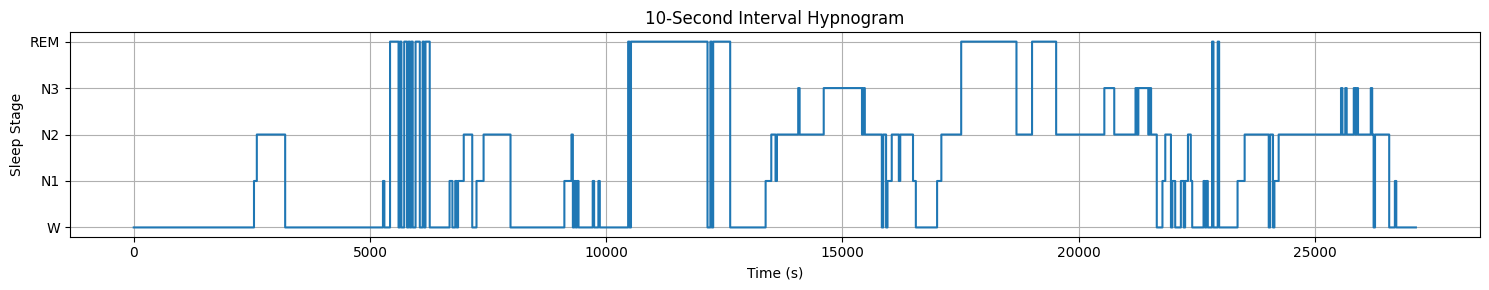

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_numeric contains 10s labels, e.g., [0, 0, 1, 2, 2, 4, ...]
# represents a person's sleep stages and cycles over time
t = np.arange(len(y_numeric)) * 10  # time axis in seconds

plt.figure(figsize=(15, 3))
plt.step(t, y_numeric, where='mid')
plt.yticks([0, 1, 2, 3, 4], ['W', 'N1', 'N2', 'N3', 'REM'])
plt.xlabel("Time (s)")
plt.ylabel("Sleep Stage")
plt.title("10-Second Interval Hypnogram")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# eeg_channels = ['C3', 'C4', 'O1', 'O2', 'F3', 'F4']

In [ ]:
import yasa
import pandas as pd

bandpower_features = []
eeg_data = eeg_raw.get_data(picks=eeg_channel)
sfreq = eeg_raw.info['sfreq']
window_len = int(sfreq * 10)

eeg_windows = []
for i in range(0, eeg_data.shape[1] - window_len + 1, window_len):
    eeg_windows.append(eeg_data[:, i:i + window_len])  # (n_channels, window_len)

for window in eeg_windows:
    bp_per_channel = []
    for ch in window:  # each EEG channel
        bp = yasa.bandpower(ch, sf=sfreq, relative=True)  # relative power in delta, theta, alpha, beta, gamma
        bp_per_channel.append(bp)

    # Average across channels
    mean_bandpower = pd.concat(bp_per_channel).groupby(level=0).mean()
    bandpower_features.append(mean_bandpower)

bp_df = pd.concat(bandpower_features, ignore_index=True)

In [20]:
bp_df 

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
0,0.877021,0.050053,0.025151,0.013020,0.022350,0.012404,7.315548e-10,0.25,1.0
1,0.911171,0.049382,0.016740,0.008334,0.011362,0.003011,2.553534e-09,0.25,1.0
2,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0
3,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0
4,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0
...,...,...,...,...,...,...,...,...,...
2710,0.618559,0.093083,0.045552,0.075907,0.134290,0.032609,4.234227e-11,0.25,1.0
2711,0.753551,0.055046,0.016322,0.019040,0.085909,0.070132,1.276956e-10,0.25,1.0
2712,0.585054,0.058035,0.030143,0.038579,0.160297,0.127892,4.725294e-11,0.25,1.0
2713,0.649482,0.054395,0.025672,0.041767,0.106937,0.121746,6.701559e-11,0.25,1.0


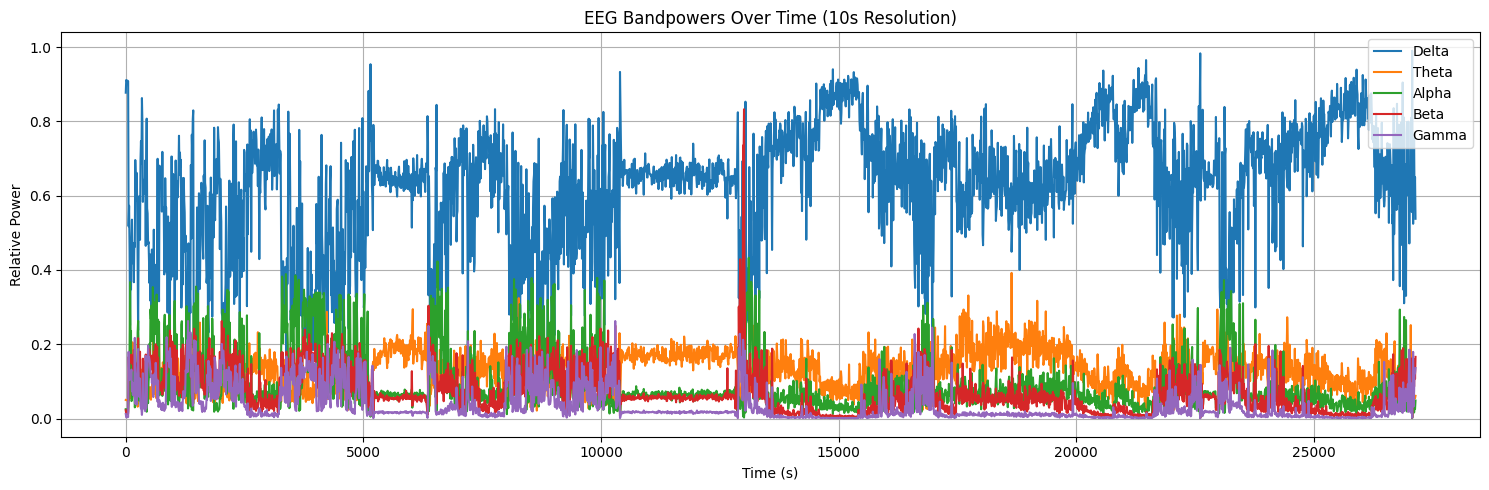

In [21]:
import numpy as np

# Time axis in seconds (1 value per 10s window)
t = np.arange(len(bp_df)) * 10

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(t, bp_df['Delta'], label='Delta', linewidth=1.5)
plt.plot(t, bp_df['Theta'], label='Theta', linewidth=1.5)
plt.plot(t, bp_df['Alpha'], label='Alpha', linewidth=1.5)
plt.plot(t, bp_df['Beta'],  label='Beta', linewidth=1.5)
plt.plot(t, bp_df['Gamma'], label='Gamma', linewidth=1.5)

plt.xlabel("Time (s)")
plt.ylabel("Relative Power")
plt.title("EEG Bandpowers Over Time (10s Resolution)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Using matplotlib as 2D backend.


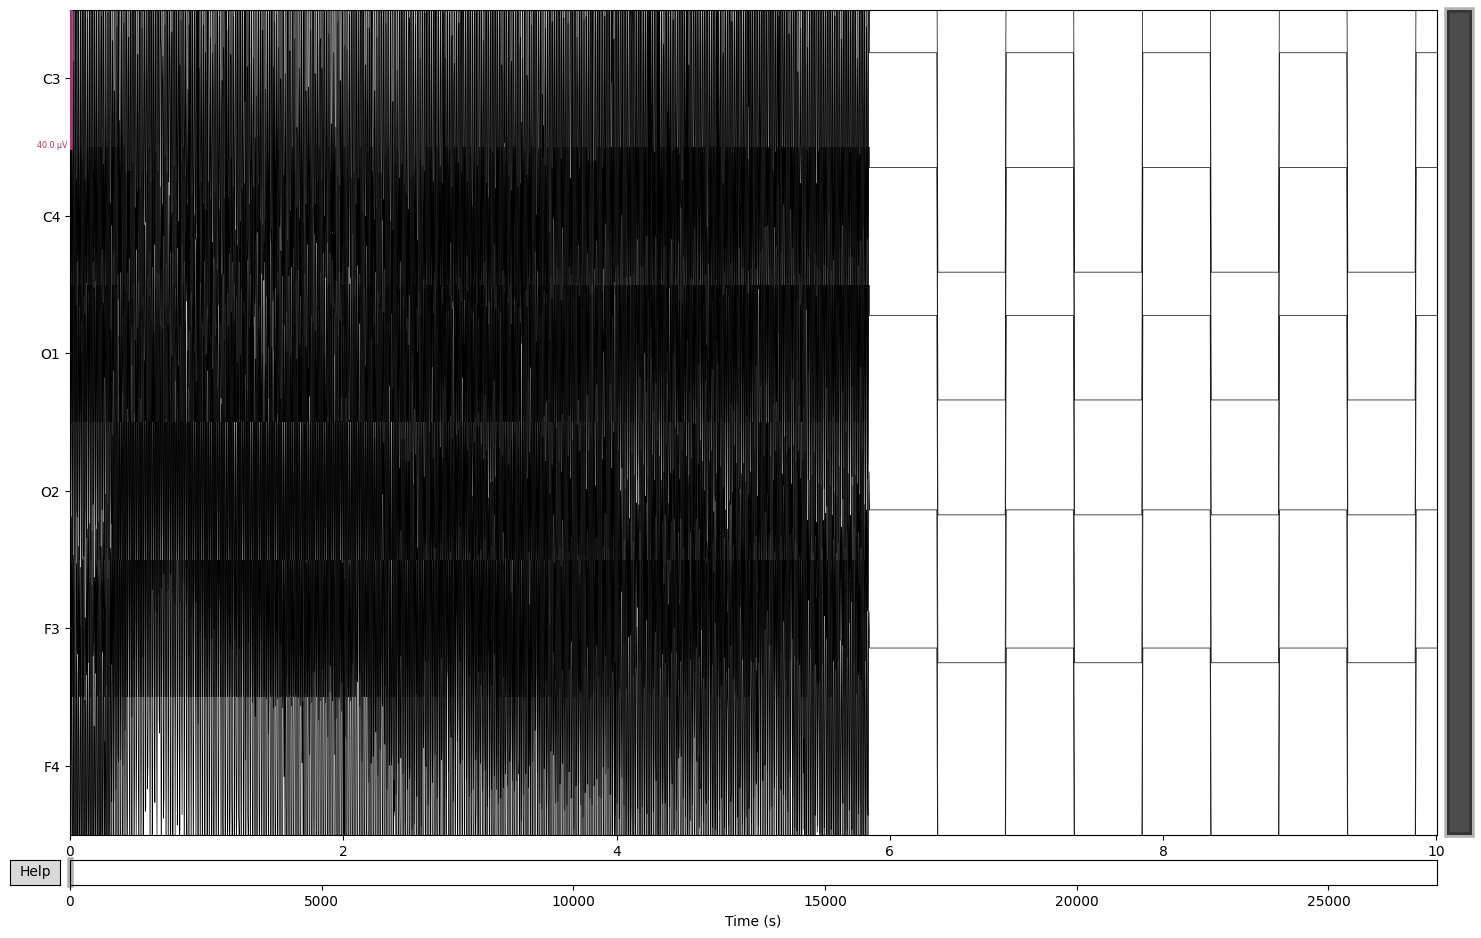

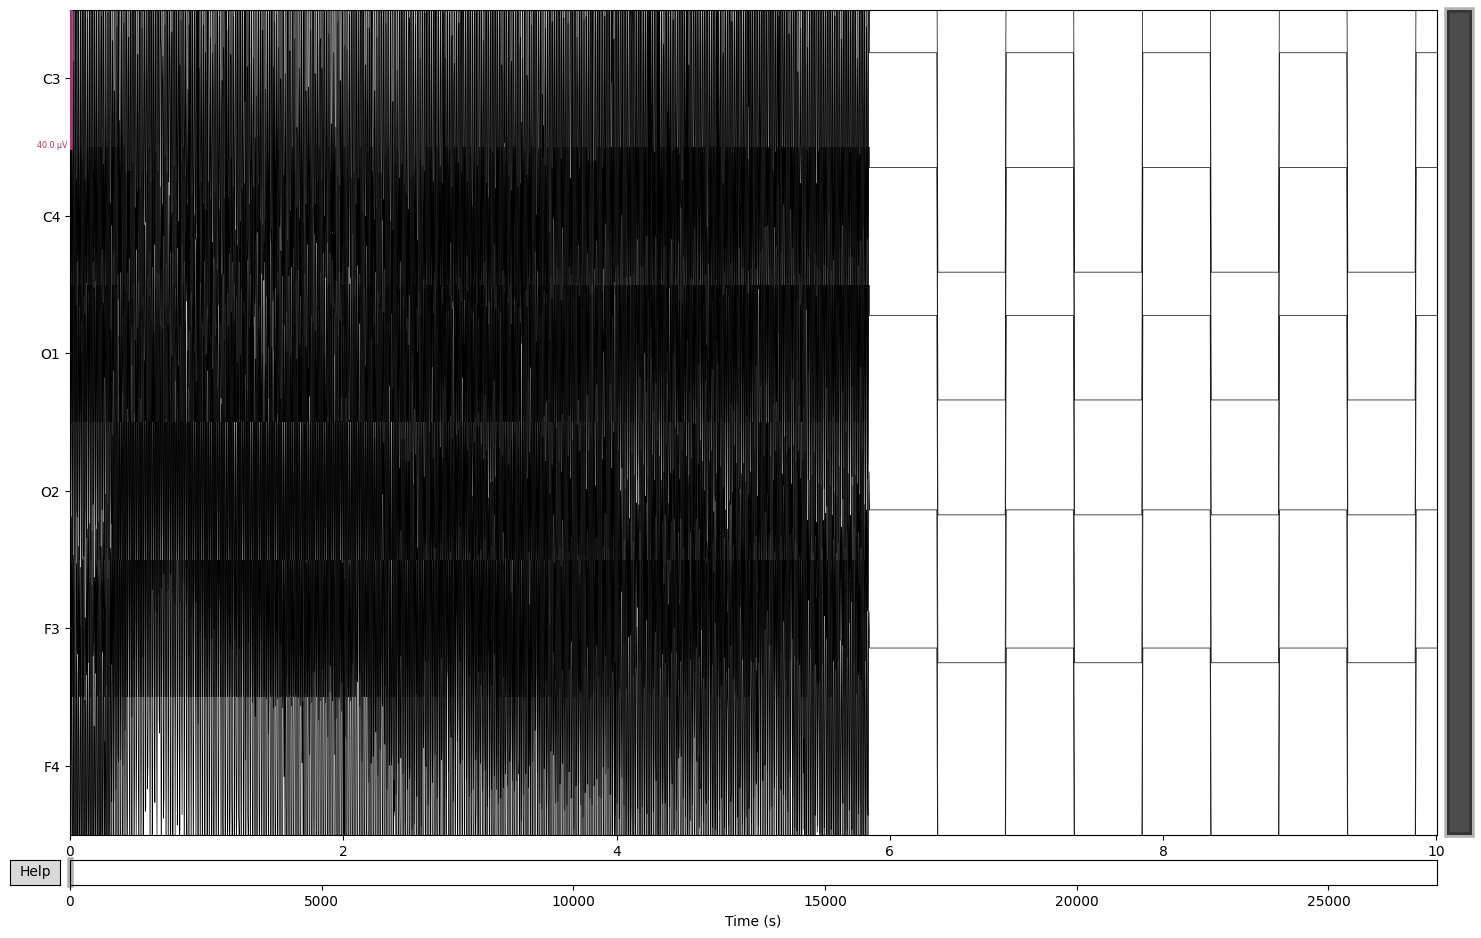

In [22]:
eeg_raw = raw.copy().pick(eeg_channels)
eeg_raw.plot(duration=10, title="EEG with Apnea Labels")

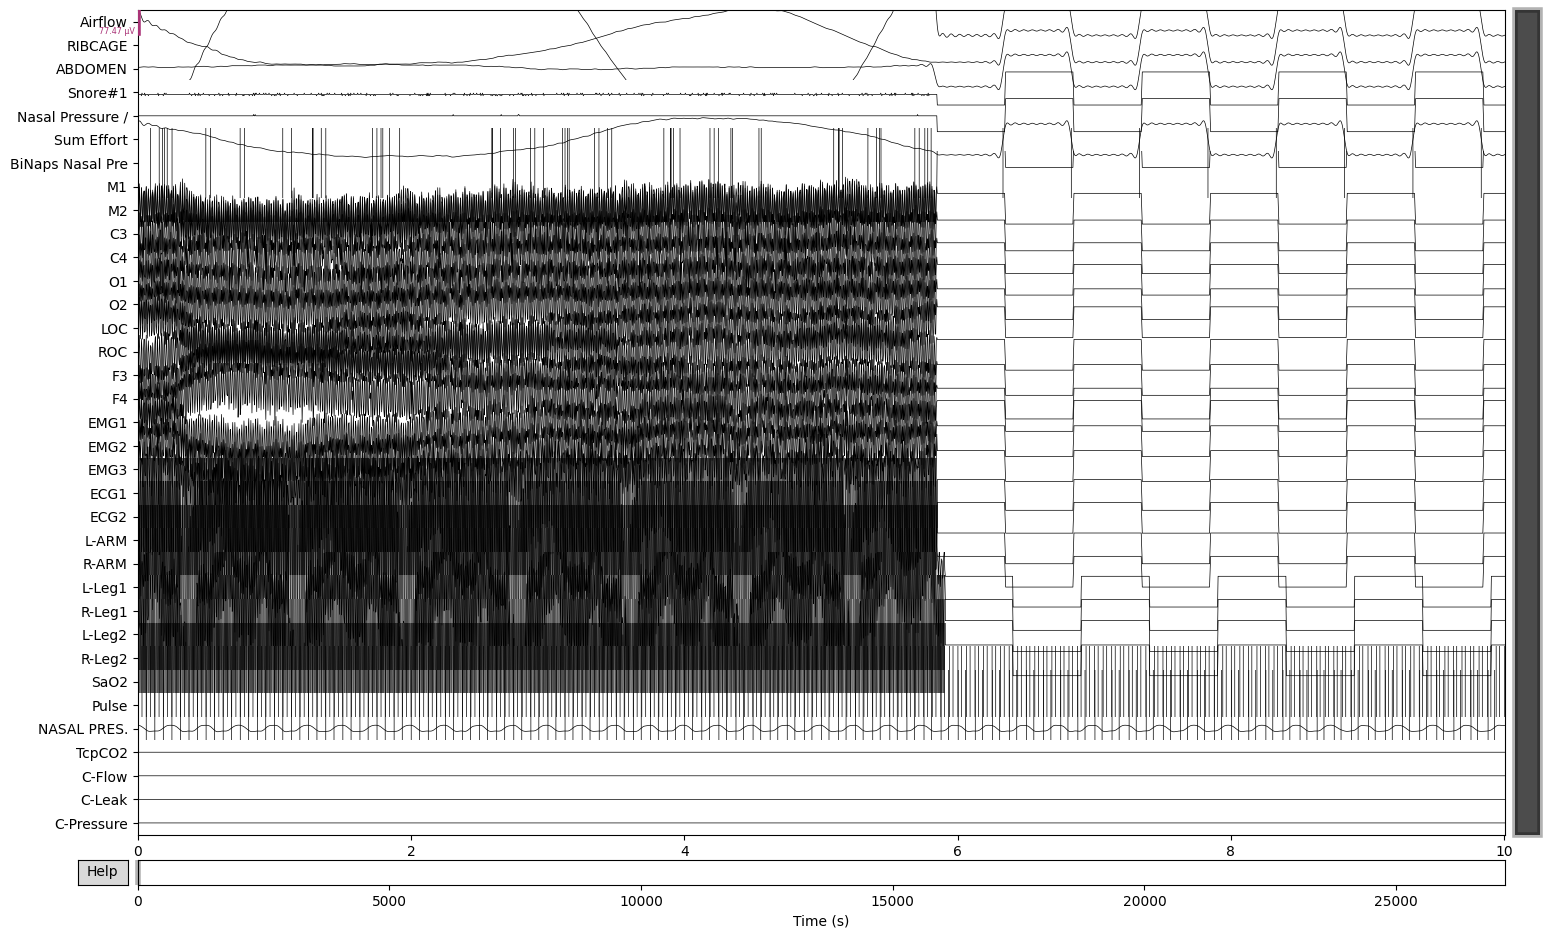

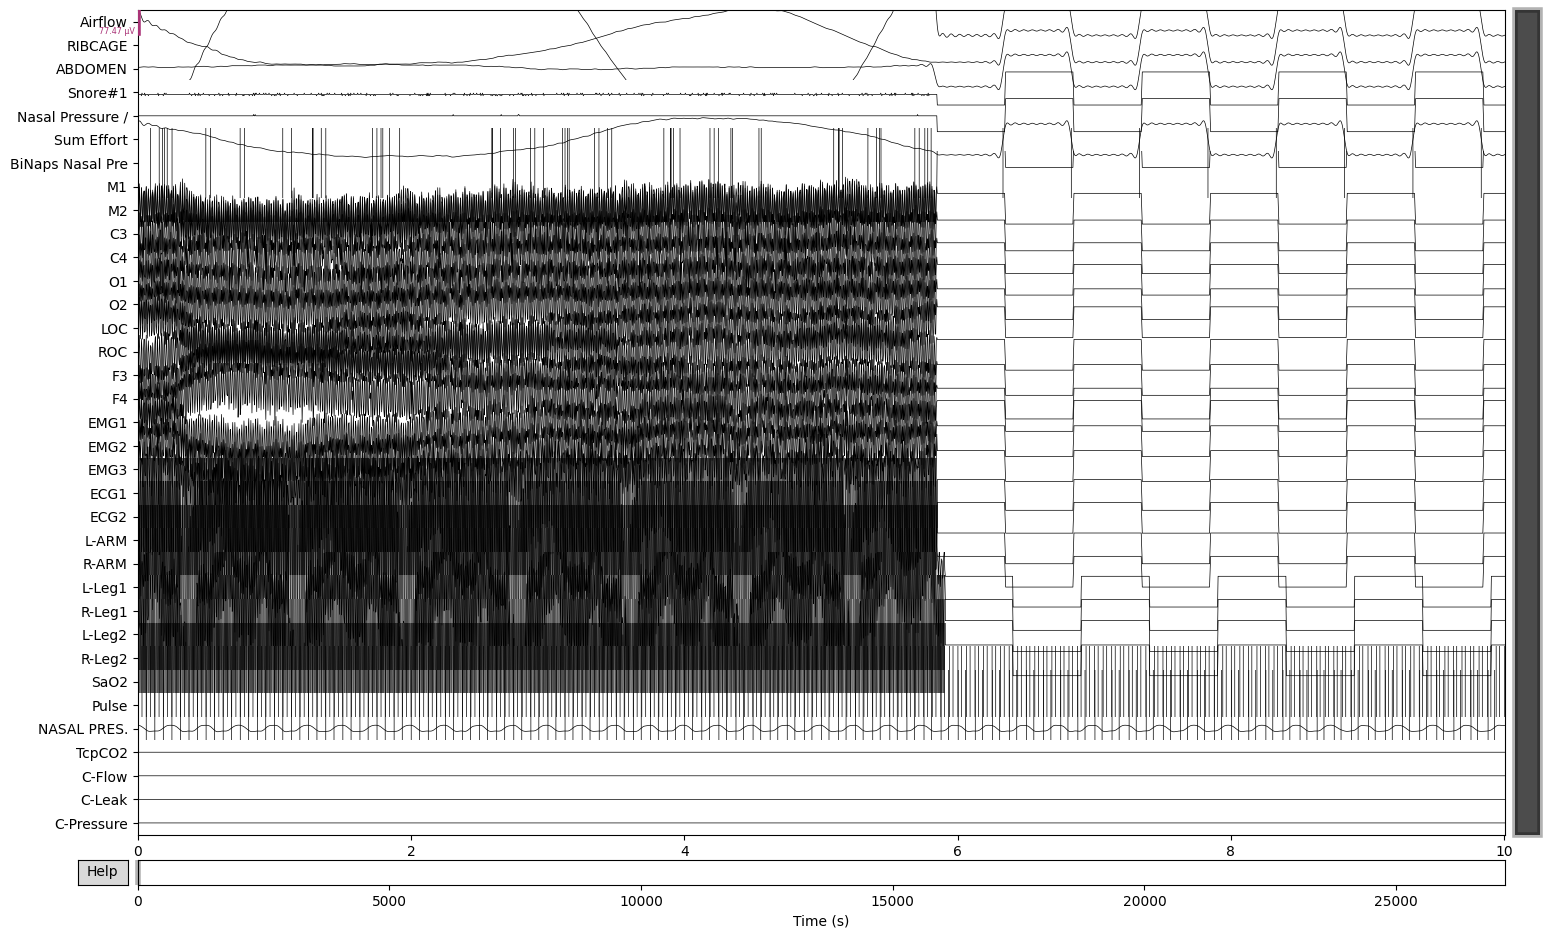

In [23]:
# Plot all signals (may take time if many channels)
raw.plot(n_channels=len(raw.ch_names), duration=10, scalings='auto', title='EDF Signal Overview')

In [70]:
import pandas as pd
from datetime import datetime, timedelta

# Step 1: Load the file without skipping rows
df_annots_txt = pd.read_csv("data/highAHI/OSAA10002 epoch and event list.txt", sep='\t', skiprows=10,
                            names=["Epoch", "Event", "Start Time", "Duration"], encoding='latin1')

df_annots_txt['Start Time'] = df_annots_txt['Start Time'].astype(str)

# Step 2: Parse recording start time from your study metadata
recording_start = datetime.strptime("2016-08-15 22:14:53", "%Y-%m-%d %H:%M:%S")

def compute_seconds(row):
    try:
        raw_time = row['Start Time']
        if pd.isna(raw_time) or str(raw_time).lower() in ['start time', 'nan']:
            return None

        t = datetime.strptime(raw_time.strip(), "%I:%M:%S %p")
        
        # Construct event datetime on the same day as recording_start
        event_time = recording_start.replace(hour=t.hour, minute=t.minute, second=t.second)

        # If the event is *earlier* than the recording start, it must be the *next day*
        if event_time < recording_start:
            event_time += timedelta(days=1)

        return (event_time - recording_start).total_seconds()
    except Exception as e:
        print(f"Could not parse row: {row['Start Time']} | {e}")
        return None

df_annots_txt['start_sec'] = df_annots_txt.apply(compute_seconds, axis=1)
df_annots_txt['duration'] = pd.to_numeric(df_annots_txt['Duration'], errors='coerce')
df_annots_txt['end_sec'] = df_annots_txt['start_sec'] + df_annots_txt['duration']

# Drop all rows with any invalid time info
# df_annots_txt = df_annots_txt.dropna(subset=['start_sec', 'duration', 'end_sec'])
df_annots_txt = df_annots_txt[df_annots_txt['start_sec'] >= 0]


In [71]:
df_annots_txt


,Epoch,Event,Start Time,Duration,start_sec,duration,end_sec
3,1,Bad Data (Channel SpO2 (Amp 1)),10:14:53 PM,28.94,0.0,28.94,28.94
4,1,Bad Data (Channel Pulse (Amp 1)),10:14:53 PM,28.94,0.0,28.94,28.94
5,9,Eyes Closed,10:19:05 PM,NaN,252.0,NaN,NaN
6,10,Eyes Open,10:19:29 PM,NaN,276.0,NaN,NaN
7,11,Eyes Left/Right,10:20:03 PM,NaN,310.0,NaN,NaN
...,...,...,...,...,...,...,...
1544,904,Wake,5:46:23 AM,NaN,27090.0,NaN,NaN
1545,905,Wake,5:46:53 AM,NaN,27120.0,NaN,NaN
1546,905,Lights On,5:47:09 AM,24.06,27136.0,24.06,27160.06
1547,905,wants to get up,5:47:13 AM,NaN,27140.0,NaN,NaN


In [61]:
df_filtered

,Epoch,Event,Start Time,Duration,start_sec,duration,end_sec
86,84,Both Legs w/ Arousal,10:56:29 PM,3.48,2496.0,3.48,2499.48
87,84,Arousal w/ PLM,10:56:31 PM,3.72,2498.0,3.72,2501.72
91,85,Both Legs w/ Arousal,10:57:16 PM,1.15,2543.0,1.15,2544.15
92,85,Arousal w/ PLM,10:57:16 PM,3.14,2543.0,3.14,2546.14
94,86,Both Legs w/ Arousal,10:57:45 PM,6.33,2572.0,6.33,2578.33
...,...,...,...,...,...,...,...
1516,883,Arousal w/ PLM,5:36:17 AM,6.54,26484.0,6.54,26490.54
1520,885,Arousal,5:36:56 AM,6.23,26523.0,6.23,26529.23
1523,886,Both Legs w/ Arousal,5:37:27 AM,2.12,26554.0,2.12,26556.12
1524,886,Arousal w/ PLM,5:37:29 AM,6.93,26556.0,6.93,26562.93


In [ ]:
keywords = ["apnea", "hypopnea", "arousal", "desaturation"]

df_filtered = df_annots_txt[
    df_annots_txt['Event'].str.lower().str.contains('|'.join(keywords))
]

def classify_event(events):
    events = "; ".join(events).lower()
    if "apnea" in events:
        return "apnea"
    elif "hypopnea" in events:
        return "hypopnea"
    elif "desaturation" in events:
        return "desaturation"
    elif "arousal" in events:
        return "arousal"
    else:
        return "normal"


In [68]:
window_labels = []
num_windows = len(bp_df)  # 2715

for i in range(num_windows):
    t_start = i * window_len
    t_end = t_start + window_len

    # Use full annotation list (not just filtered clinical events)
    overlapping = df_annots_txt[
        (df_annots_txt['start_sec'] <= t_end) &
        (df_annots_txt['end_sec'] > t_start)
    ]

    if not overlapping.empty:
        # Label using the first event (or concatenate, or prioritize if needed)
        label = "; ".join(overlapping['Event'].values)  # You could use just the first: `overlapping['Event'].values[0]`
        print(f"Window {i}: matched → {label}")
    else:
        label = "normal"
        print(f"Window {i}: no match → normal")

    window_labels.append(label)

labels_df = pd.DataFrame({
    'Window_Index': range(num_windows),
    'Event_Label': window_labels
})


Window 0: matched → Bad Data (Channel SpO2  (Amp 1)); Bad Data (Channel Pulse  (Amp 1)); Wake; Lights Off; Left; Right; Stage 1; Wake; Stage 1; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs; Both Legs; Both Legs w/ Arousal; Arousal w/ PLM
Window 1: matched → Lights Off; Right; Stage 1; Both Legs w/ Arousal; Arousal w/ PLM; Stage 2; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs; Desaturation; Both Legs; Both Legs w/ Arousal; Arousal w/ PLM; Hypopnea w/ Arousal; Arousal w/ Respiratory; Desaturation w/ Respiratory; Both Legs; Both Legs; Both Legs; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs w/ Arousal; Arousal w/ PLM; Both Legs; Both Legs; Both Legs; Both Legs; Both Legs w/ Arousal; Arousal w/ PLM; Wake; Su

In [69]:
labels_df

,Window_Index,Event_Label
0,0,Bad Data (Channel SpO2 (Amp 1)); Bad Data (Ch...
1,1,Lights Off; Right; Stage 1; Both Legs w/ Arous...
2,2,Lights Off; Wake; Supine; Bad Data (Channel Sp...
3,3,Lights Off; Bathroom Out; Right; Stage 2; Both...
4,4,Lights Off; Bathroom Out; Supine; Wake; Bad Da...
...,...,...
2710,2710,normal
2711,2711,normal
2712,2712,normal
2713,2713,normal


In [66]:
labels_df.Event_Label.value_counts()

Event_Label
normal          2705
hypopnea           8
arousal            1
desaturation       1
Name: count, dtype: int64

In [31]:
df_annots_txt

,Epoch,Event,Start Time,Duration,start_sec,duration,end_sec
3,1,Bad Data (Channel SpO2 (Amp 1)),10:14:53 PM,28.94,0.0,28.94,28.94
4,1,Bad Data (Channel Pulse (Amp 1)),10:14:53 PM,28.94,0.0,28.94,28.94
5,9,Eyes Closed,10:19:05 PM,NaN,252.0,NaN,NaN
6,10,Eyes Open,10:19:29 PM,NaN,276.0,NaN,NaN
7,11,Eyes Left/Right,10:20:03 PM,NaN,310.0,NaN,NaN
...,...,...,...,...,...,...,...
1544,904,Wake,5:46:23 AM,NaN,27090.0,NaN,NaN
1545,905,Wake,5:46:53 AM,NaN,27120.0,NaN,NaN
1546,905,Lights On,5:47:09 AM,24.06,27136.0,24.06,27160.06
1547,905,wants to get up,5:47:13 AM,NaN,27140.0,NaN,NaN


In [39]:
df_filtered

,Epoch,Event,Start Time,Duration,start_sec,duration,end_sec
86,84,Both Legs w/ Arousal,10:56:29 PM,3.48,2496.0,3.48,2499.48
87,84,Arousal w/ PLM,10:56:31 PM,3.72,2498.0,3.72,2501.72
91,85,Both Legs w/ Arousal,10:57:16 PM,1.15,2543.0,1.15,2544.15
92,85,Arousal w/ PLM,10:57:16 PM,3.14,2543.0,3.14,2546.14
94,86,Both Legs w/ Arousal,10:57:45 PM,6.33,2572.0,6.33,2578.33
...,...,...,...,...,...,...,...
1516,883,Arousal w/ PLM,5:36:17 AM,6.54,26484.0,6.54,26490.54
1520,885,Arousal,5:36:56 AM,6.23,26523.0,6.23,26529.23
1523,886,Both Legs w/ Arousal,5:37:27 AM,2.12,26554.0,2.12,26556.12
1524,886,Arousal w/ PLM,5:37:29 AM,6.93,26556.0,6.93,26562.93


In [40]:
bp_df = bp_df.copy()  # to avoid modifying the original accidentally
bp_df['Event_Label'] = window_labels

# should i add sleep stage labels to this dataframe?
bp_df

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative,Event_Label,Label_Encoded
0,0.877021,0.050053,0.025151,0.013020,0.022350,0.012404,7.315548e-10,0.25,1.0,arousal,0
1,0.911171,0.049382,0.016740,0.008334,0.011362,0.003011,2.553534e-09,0.25,1.0,hypopnea,2
2,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0,desaturation,1
3,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0,hypopnea,2
4,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0,normal,3
...,...,...,...,...,...,...,...,...,...,...,...
2710,0.618559,0.093083,0.045552,0.075907,0.134290,0.032609,4.234227e-11,0.25,1.0,normal,3
2711,0.753551,0.055046,0.016322,0.019040,0.085909,0.070132,1.276956e-10,0.25,1.0,normal,3
2712,0.585054,0.058035,0.030143,0.038579,0.160297,0.127892,4.725294e-11,0.25,1.0,normal,3
2713,0.649482,0.054395,0.025672,0.041767,0.106937,0.121746,6.701559e-11,0.25,1.0,normal,3


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bp_df['Label_Encoded'] = le.fit_transform(bp_df['Event_Label'])  # e.g., normal → 2, hypopnea → 1, apnea → 0, etc.
bp_df

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative,Event_Label,Label_Encoded
0,0.877021,0.050053,0.025151,0.013020,0.022350,0.012404,7.315548e-10,0.25,1.0,arousal,0
1,0.911171,0.049382,0.016740,0.008334,0.011362,0.003011,2.553534e-09,0.25,1.0,hypopnea,2
2,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0,desaturation,1
3,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0,hypopnea,2
4,0.909172,0.049507,0.016945,0.008560,0.012196,0.003619,2.559843e-09,0.25,1.0,normal,3
...,...,...,...,...,...,...,...,...,...,...,...
2710,0.618559,0.093083,0.045552,0.075907,0.134290,0.032609,4.234227e-11,0.25,1.0,normal,3
2711,0.753551,0.055046,0.016322,0.019040,0.085909,0.070132,1.276956e-10,0.25,1.0,normal,3
2712,0.585054,0.058035,0.030143,0.038579,0.160297,0.127892,4.725294e-11,0.25,1.0,normal,3
2713,0.649482,0.054395,0.025672,0.041767,0.106937,0.121746,6.701559e-11,0.25,1.0,normal,3


In [45]:
bp_df.Event_Label.value_counts()

Event_Label
normal          2705
hypopnea           8
arousal            1
desaturation       1
Name: count, dtype: int64

In [42]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'arousal': np.int64(0),
 'desaturation': np.int64(1),
 'hypopnea': np.int64(2),
 'normal': np.int64(3)}

In [43]:
X = bp_df[['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Sigma']]  # or any features you used
y = bp_df['Label_Encoded']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

### CNN Model

In [239]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(16, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)           # (B, 1, F)
        x = F.relu(self.conv1(x))    # (B, 16, F)
        x = self.pool(x).squeeze(-1) # (B, 16)
        x = self.fc(x)               # (B, C)
        return x


### RNN

In [ ]:
class RNNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.rnn = nn.GRU(input_size=input_dim, hidden_size=hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):  # x: (B, T, F)
        _, h_n = self.rnn(x)  # h_n: (1, B, H)
        return self.fc(h_n.squeeze(0))  # (B, C)


### Transformers

In [241]:
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads=2, ff_dim=128, num_layers=2):
        super().__init__()
        self.embed = nn.Linear(input_dim, ff_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=ff_dim, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.cls_token = nn.Parameter(torch.randn(1, 1, ff_dim))
        self.fc = nn.Linear(ff_dim, num_classes)

    def forward(self, x):  # (B, T, F)
        B, T, F = x.size()
        x = self.embed(x)  # (B, T, D)
        cls_tokens = self.cls_token.expand(B, 1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = self.transformer(x)     # (B, T+1, D)
        return self.fc(x[:, 0, :])  # classification on CLS token


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

model = CNNClassifier(input_dim=6, num_classes=len(le.classes_))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch} - Loss: {loss.item():.4f}")
